In [1]:
############################################################################################

##############################       Game dataSet project     ##############################     

############################################################################################

In [2]:
#import the required libries


#import sqlalchemy
#from scipy import stats
#import math 
#import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
#read the data called "Video_Games_Sales_as_at_22_Dec_2016.csv"
df=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#information of the data to know the number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#describing the data
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
#dealing with the missing data
count = 0
for ind, bol in enumerate(df['Name'].isna()):
    if bol == True:
        count += 1
        print('index are', ind)

print('There are ',count, 'rows missing')
print(df.loc[657:660])
df.drop(df.index[659], inplace=True)
print(df.loc[657:660])

index are 659
index are 14246
There are  2 rows missing
                                         Name Platform  Year_of_Release  \
657  Frogger's Adventures: Temple of the Frog      GBA              NaN   
658                                  Monopoly       PC           1994.0   
659                                       NaN      GEN           1993.0   
660                               Guitar Hero      PS2           2005.0   

         Genre                     Publisher  NA_Sales  EU_Sales  JP_Sales  \
657  Adventure  Konami Digital Entertainment      2.15      0.18      0.00   
658       Misc            Hasbro Interactive      1.49      0.81      0.00   
659        NaN         Acclaim Entertainment      1.78      0.53      0.00   
660       Misc                     RedOctane      1.67      0.61      0.03   

     Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
657         0.07          2.39          73.0           4.0        tbd   
658         0.10          2.39 

In [7]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
print('Number of rows = {}'.format(len(df)))
print('Number of columns = {}'.format(len(df.columns)))
df.info()

Number of rows = 16718
Number of columns = 16
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16718 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16718 non-null  object 
 2   Year_of_Release  16449 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16664 non-null  object 
 5   NA_Sales         16718 non-null  float64
 6   EU_Sales         16718 non-null  float64
 7   JP_Sales         16718 non-null  float64
 8   Other_Sales      16718 non-null  float64
 9   Global_Sales     16718 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9

In [9]:
# convert to missing data
sentinels = {'Year_of_Release': ['N/A'], 'Publisher': ['Unknown'], 'User_Score':['tbd'],'Name':['no value']}
df2 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv' )
df2 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv',na_values=sentinels)

## Now all the meaning less data has beem converted to missing data.

# re-index
df2.index+=1


In [10]:
#review the data after cleaning it and subsitute the missing values
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Change the float value to integer in column "Year_of_Release"

df2[pd.isnull(df2['Year_of_Release'])] = -1
df2['Year_of_Release']=df2['Year_of_Release'].astype(int)
origin_df = df2.copy()
origin_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# get game amount by summing up game names
''''t1=df2.groupby('Platform').get_group('PS4')
t1=t1[t1['Year_of_Release'] >= 2013]

t2=df2.groupby('Platform').get_group('Wii')
t2=t2[t2['Year_of_Release'] >= 2013]

t3=df2.groupby('Platform').get_group('X360')
t3=t3[t3['Year_of_Release'] >= 2013]

t4=df2.groupby('Platform').get_group('PC')
t4=t4[t4['Year_of_Release'] >= 2013]
'''

"'t1=df2.groupby('Platform').get_group('PS4')\nt1=t1[t1['Year_of_Release'] >= 2013]\n\nt2=df2.groupby('Platform').get_group('Wii')\nt2=t2[t2['Year_of_Release'] >= 2013]\n\nt3=df2.groupby('Platform').get_group('X360')\nt3=t3[t3['Year_of_Release'] >= 2013]\n\nt4=df2.groupby('Platform').get_group('PC')\nt4=t4[t4['Year_of_Release'] >= 2013]\n"

In [13]:
#colourizing each genre and Platform

#colouring the genre's values
coldic = {'Action' : "b", 'Role-Playing' : "#55cc30", 'Sports' : "r", 'Shooter' : "#ff0090", 'Adventure' : "m",
          'Misc' : "y", 'Racing' : '#ffa035', 'Fighting' : '#ddddd7', 'Strategy' : "#fffa00", 'Platform' : '#31f1e8',
          'Simulation' : '#567753', 'Puzzle' : '#421111' } 

#colouring the Platform's values
coldic_Platform = {'PS3' : "b", 'PS4' : "#55cc30", 'X360' : "r", '3DS' : "#ff0090", 'XOne' : "m",
          'WiiU' : "y", 'PSV' : '#ffa035', 'PC' : '#ddddd7', 'Wii' : "#fffa00", 'PSP' : '#31f1e8'} 


In [14]:
############################################################################################

##############################       the first quistion       ##############################     

############################################################################################

In [15]:
#filtering the data to get the sales of each region for the last 16 years groupedby year of release

#[(df2.Year_of_Release>2008)&(df2.Year_of_Release<2017)] another mask


df33=df2[(df2.Year_of_Release>1999)&(df2.Year_of_Release<2017)]

df_final = df33.groupby('Year_of_Release').sum().sort_values('Global_Sales', ascending=False).drop([ 'Critic_Score', 'Critic_Count', 'User_Count','User_Score','Global_Sales'], axis=1)


In [16]:
df_final.info()
df_final.head(16)

## After cleaning the data it has no missing values(NAN)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2008 to 2016
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NA_Sales     17 non-null     float64
 1   EU_Sales     17 non-null     float64
 2   JP_Sales     17 non-null     float64
 3   Other_Sales  17 non-null     float64
dtypes: float64(4)
memory usage: 680.0 bytes


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
2008,348.69,181.14,60.25,81.42
2009,335.55,187.94,61.89,73.44
2007,309.89,157.82,60.29,76.75
2010,300.65,171.42,59.49,58.57
2006,262.13,127.89,73.74,53.95
2011,238.79,162.97,53.07,52.75
2005,242.15,121.11,54.27,40.29
2004,222.51,107.28,41.65,47.24
2002,216.19,109.75,41.76,27.27


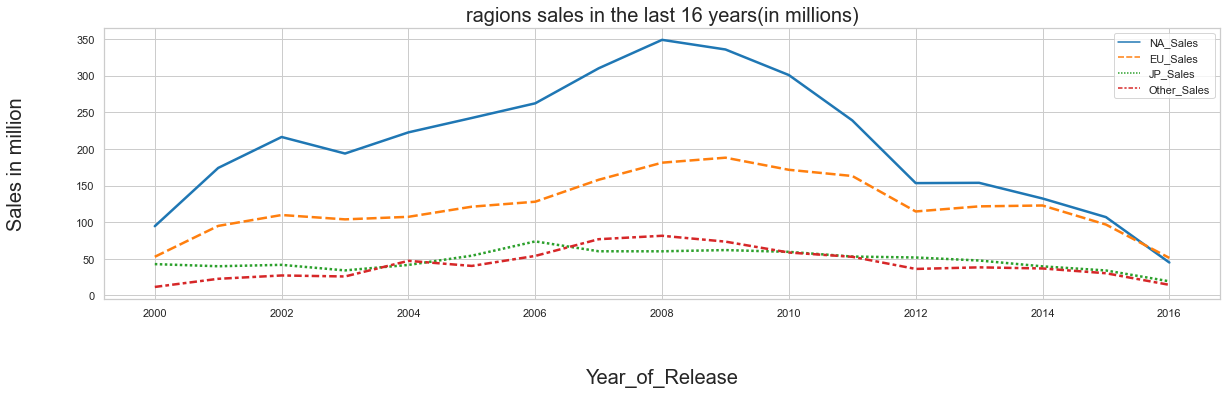

In [17]:
#visulize the filtererd dataframe aboved
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")

sns.lineplot(data=df_final, palette="tab10", linewidth=2.5,)
plt.ylabel("Sales in million", labelpad=50, fontdict={'fontsize':20})
plt.xlabel("Year_of_Release", labelpad=50, fontdict={'fontsize':20})
plt.title('ragions sales in the last 16 years(in millions)',fontsize=20);


In [18]:
#filtering the data to get the global sales for the last 16 years groupedby year of release
df34=df2[(df2.Year_of_Release>1999)&(df2.Year_of_Release<2017)]

df_final = df34.groupby('Year_of_Release').sum().sort_values('Global_Sales', ascending=False).drop([ 'Critic_Score', 'Critic_Count', 'User_Count','User_Score','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
df_final.head(16)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2008 to 2016
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Global_Sales  17 non-null     float64
dtypes: float64(1)
memory usage: 272.0 bytes


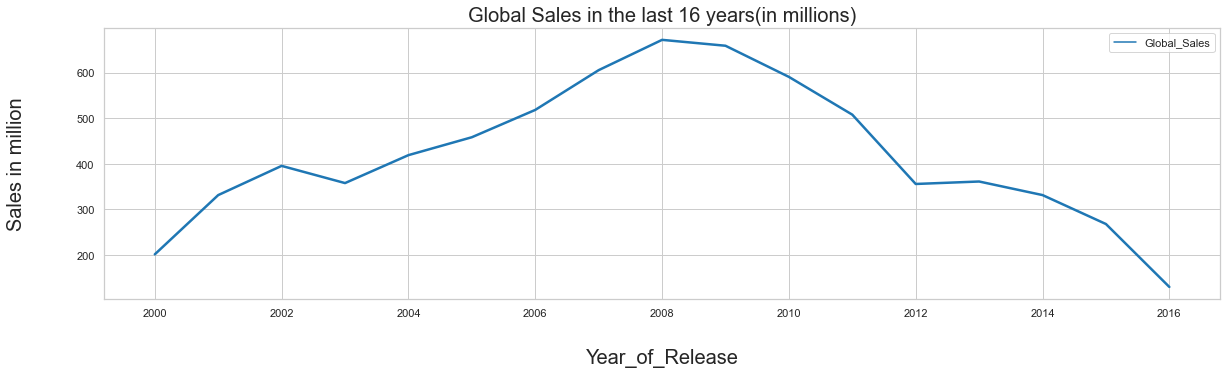

In [19]:
#visulize the filtererd dataframe aboved
plt.figure(figsize=(20,5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df_final, palette="tab10", linewidth=2.5,color='M')
plt.ylabel("Sales in million", labelpad=50, fontdict={'fontsize':20})
plt.xlabel("Year_of_Release", labelpad=30, fontdict={'fontsize':20})
plt.title('Global Sales in the last 16 years(in millions)',fontsize=20);

In [20]:
############################################################################################

##############################      the Second quistion       ##############################     

############################################################################################

In [21]:

#clean the data by extracting an exact date range and genre
df44=df2[(df2.Year_of_Release>2011) & (df2.Genre=="Action")]
#grouping them by the platform
Platform_df = df44.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).drop(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count','User_Score','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
# we want to review the data before the visualization
Platform_df.head(10)



,Global_Sales
Platform,
PS3,115.61
PS4,96.18
X360,81.56
3DS,45.58
XOne,37.35
WiiU,19.05
PSV,16.39
PC,13.15
Wii,10.76


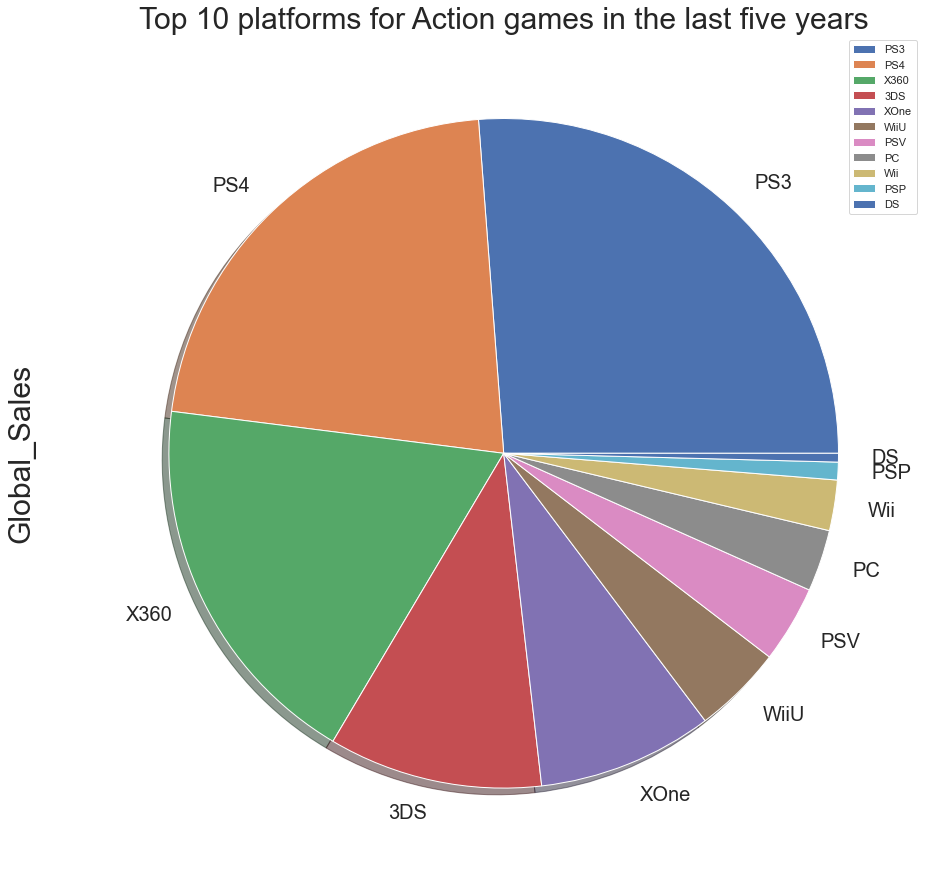

In [22]:
#the choosen visual is a pie chart due to it's represent the published games in term of Action genre of each Platform

plot = Platform_df.plot.pie(subplots=True, figsize=(15, 20),shadow=True,fontsize=20);
plt.title('Top 10 platforms for Action games in the last five years',fontsize=30)
plt.ylabel("Global_Sales", labelpad=50, fontdict={'fontsize':30})
plt.show()

In [23]:
############################################################################################

##############################       third quistion        #################################    

############################################################################################

In [24]:
#clean the data by extracting an exact genre
df4=df2[df2.Genre=="Action"]
top_publisher = df4['Publisher'].value_counts().head(10).sort_values(ascending=False)
top_publisher.head(3)

Activision            309
Namco Bandai Games    250
Ubisoft               198
Name: Publisher, dtype: int64

In [25]:
#%matplotlib inline
#the visual edits
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 30
plt.rcParams['figure.figsize'] = (2,2)
plt.rcParams['figure.facecolor'] = '#0F0F0F0F'

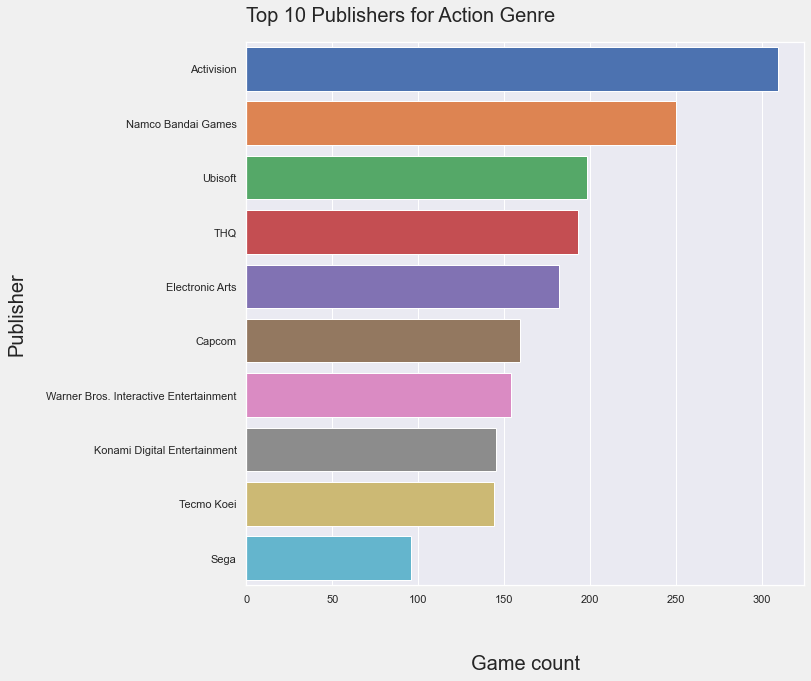

In [26]:

#the choosen visual is a bar chart
plt.figure(figsize=(10,10));
plt.title("Top 10 Publishers for Action Genre", pad = 20, loc='left', fontdict={'fontsize':20})
plt.xlabel("Game count", labelpad=50, fontdict={'fontsize':20})
#plt.xticks(rotation=280)
plt.ylabel("Publisher", labelpad=20, fontdict={'fontsize':20})
plt.rcParams['font.size']=30

# plt.set_width(21)

sns.barplot(y = top_publisher.index, x = top_publisher.values, saturation = 1);

In [27]:
############################################################################################

##############################       Fourth quistion       #################################    

############################################################################################

In [28]:
#clean the data by extracting an exact date 
df3=df2[df2.Year_of_Release==2015]
regional_df = df3.groupby('Genre').sum().sort_values('Global_Sales', ascending=False).drop(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count','User_Score'], axis=1)
# we want to review the data before the visualization
regional_df.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,24.39,24.14,15.98,7.51,72.04
Shooter,31.94,24.38,2.73,8.46,67.49
Sports,18.77,15.81,0.73,5.53,40.90
Role-Playing,13.93,12.93,6.80,3.98,37.66
Misc,4.82,3.60,2.15,1.00,11.56
Adventure,2.89,3.35,1.04,0.88,8.15
Racing,2.09,4.75,0.28,0.95,8.07
Fighting,3.70,2.38,0.79,1.03,7.92
Platform,2.49,1.81,1.31,0.44,6.06


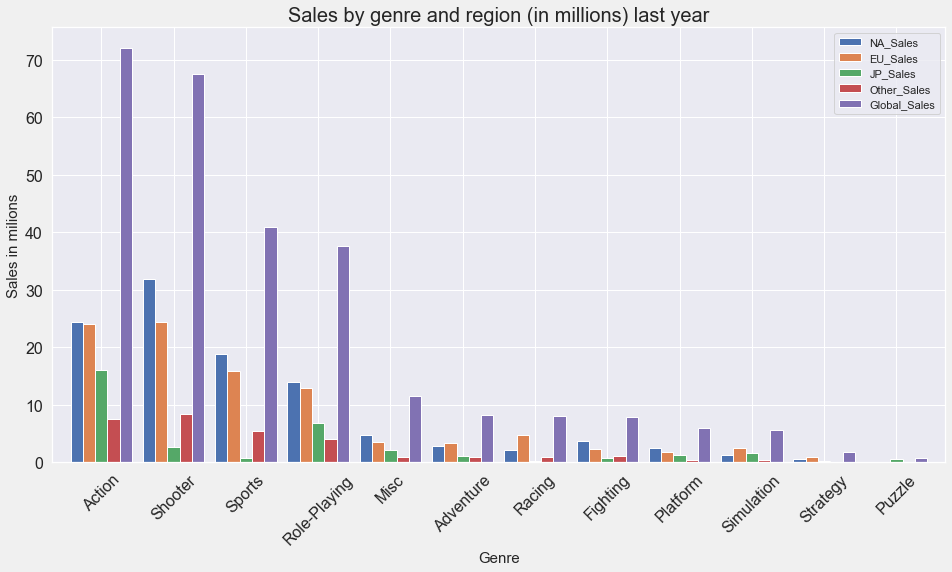

In [29]:
#the choosen visual is a bar 
regional_df.plot(kind='bar', figsize = (16,8), rot=45, fontsize=16, grid=True, width=0.85);
plt.title('Sales by genre and region (in millions) last year',fontsize=20)
plt.ylabel("Sales in milions",fontsize=15)
plt.xlabel("Genre",fontsize=15)
plt.show()
#plt.savefig('testplot.png')

In [30]:
""""#filtering the data for the last five years groupedby year of release
#[(df2.Year_of_Release>2008)&(df2.Year_of_Release<2017)]
df33=df2[(df2.Year_of_Release>1999)&(df2.Year_of_Release<2017)]

df_final = df33.groupby('Year_of_Release').sum().sort_values('Global_Sales', ascending=False).drop([ 'Critic_Score', 'Critic_Count', 'User_Count','User_Score','Global_Sales'], axis=1)
df_final.head(10)
"""""

'"#filtering the data for the last five years groupedby year of release\n#[(df2.Year_of_Release>2008)&(df2.Year_of_Release<2017)]\ndf33=df2[(df2.Year_of_Release>1999)&(df2.Year_of_Release<2017)]\n\ndf_final = df33.groupby(\'Year_of_Release\').sum().sort_values(\'Global_Sales\', ascending=False).drop([ \'Critic_Score\', \'Critic_Count\', \'User_Count\',\'User_Score\',\'Global_Sales\'], axis=1)\ndf_final.head(10)\n'

In [31]:
############################################################################################

##############################       Extra Work #1         #################################    

############################################################################################

In [32]:
#top 20 games sales filtering
df99=df2[(df2.Name!="-1")&(df2.Year_of_Release>1999)&(df2.Year_of_Release<2017)]
DF_EXTRA=df99.groupby('Name').sum().sort_values('Global_Sales', ascending=False).drop(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count','User_Score','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
vis=DF_EXTRA.head(20)
vis

,Global_Sales
Name,
Wii Sports,82.53
Grand Theft Auto V,56.57
Mario Kart Wii,35.52
Wii Sports Resort,32.77
Call of Duty: Modern Warfare 3,30.59
New Super Mario Bros.,29.80
Call of Duty: Black Ops II,29.40
Call of Duty: Black Ops,29.19
Wii Play,28.92


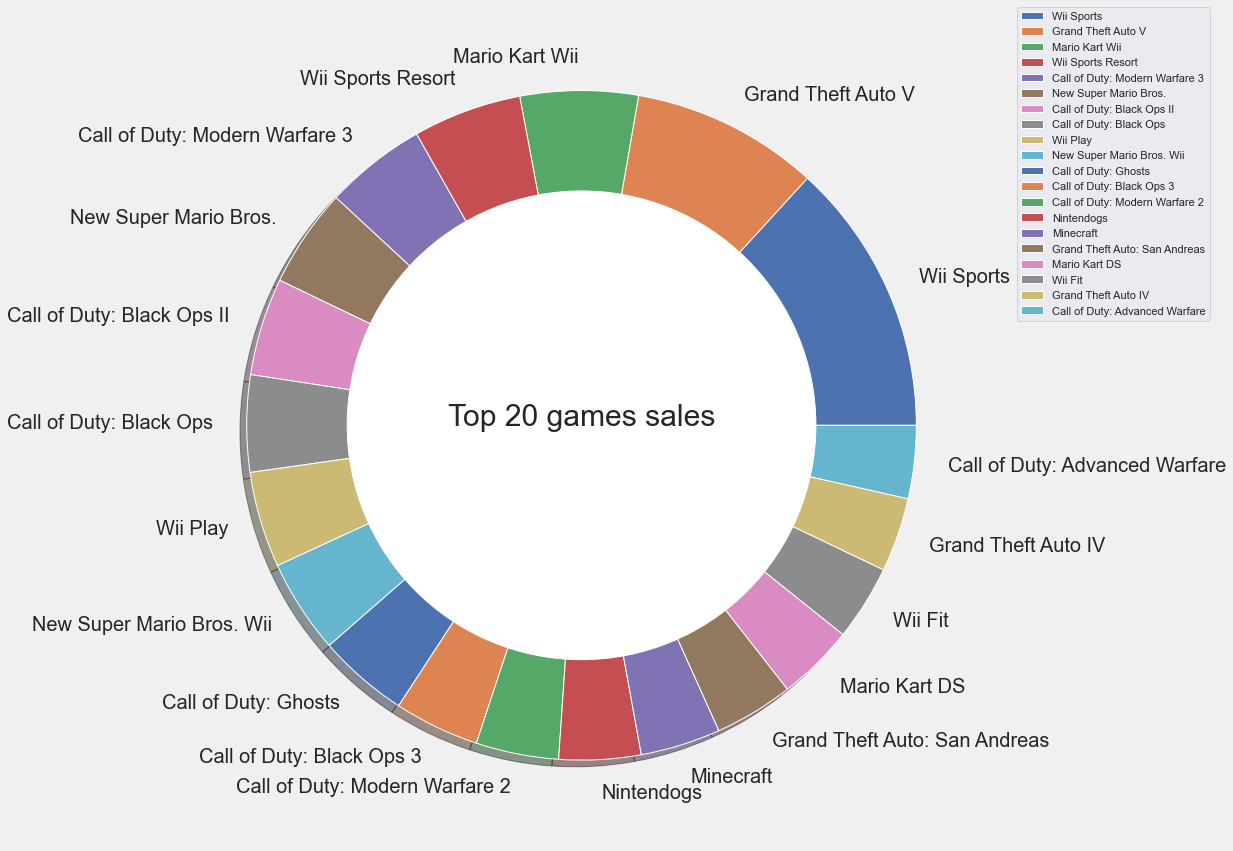

In [36]:
#visulazing the best selling games 

#plt.Circle(subplots=True, figsize=(15, 20),shadow=True,fontsize=20)
plot = vis.plot.pie(subplots=True, figsize=(15, 25),shadow=True,fontsize=20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#plt.title("top 20 games sales",fontsize=30)
circle = plt.Circle( (0,0), 0.7, color='w')
p=plt.gcf()
plt.text(-.40,0, "Top 20 games sales")
plt.ylabel("", labelpad=50, fontdict={'fontsize':20})

p.gca().add_artist(circle)
plt.show()